In [3]:
import os
os.getenv("GROQ_API_KEY")

'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'

In [6]:
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [9]:
from langchain_groq import ChatGroq
llm_model= "deepseek-r1-distill-llama-70b"
model = ChatGroq(model=llm_model)
output = model.invoke("Hi, how are you")
print(output)

content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.192073741, 'prompt_time': 0.000154178, 'queue_time': 0.09490871299999999, 'total_time': 0.192227919}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None} id='run--b6aaa76a-a686-4f2a-b670-9515d8d5b145-0' usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50}


In [16]:
import operator 
from typing import List
from langchain_core.tools import tool
from pydantic import BaseModel, Field
from typing import TypedDict, Annotated, Sequence
from langgraph.graph import StateGraph, MessagesState, START, END

In [69]:
def call_model(state: MessagesState):
    message = state["messages"]
    response = model.invoke(message)
    return {"messages": [response]}

In [79]:
state = {
    "messages": [
        "Hi, How are you"
    ]
}



In [80]:
workflow = StateGraph(MessagesState)


In [81]:
workflow.add_node("mybot", call_model)

In [82]:
workflow.add_edge(START, "mybot")

In [83]:
workflow.add_edge("mybot", END )

In [84]:
app = workflow.compile()


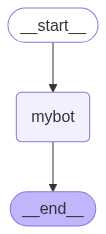

In [85]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [86]:
state = {
    "messages": [
        "Hi, How are you"
    ]
}



In [87]:
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.2152204, 'prompt_time': 0.000333716, 'queue_time': 0.09156362700000001, 'total_time': 0.215554116}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e6e502de-4d4a-47db-9500-783529c4f68f-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50})]}

In [88]:
app.invoke(state)

{'messages': [HumanMessage(content='Hi, How are you', additional_kwargs={}, response_metadata={}, id='b02da889-3383-4df0-b69d-b9e097ff560d'),
  AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.322845897, 'prompt_time': 0.000141188, 'queue_time': 0.091957912, 'total_time': 0.322987085}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--c2dab9e0-f959-45b9-8a45-37fdc4d1dbbb-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50})]}

In [90]:
# for output in app.stream(input):
#     for key,value in output.items():
#         print(f"Output from {key} Node")
#         print("_______________")
#         print(value)
#         print("\n")

In [91]:
@tool
def search(query:str):
    """ this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temperature is 45 degrees and it is Sunny."
    return "the temperature is 25 degress and it is cloudy"

In [92]:
search.invoke("what is the temperature in Delhi")

'the temperature is 45 degrees and it is Sunny.'

In [94]:
search.invoke("what is the temperature in Kashmir")

'the temperature is 25 degress and it is cloudy'

In [95]:
tools = [search]

In [98]:
llm_with_tools = model.bind_tools(tools)

In [102]:
response = llm_with_tools.invoke("What is the weather in kashmir")

In [103]:
print(response)

content='' additional_kwargs={'tool_calls': [{'id': 'p8vg794xw', 'function': {'arguments': '{"query":"weather in Kashmir"}', 'name': 'search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 133, 'total_tokens': 280, 'completion_time': 0.644926923, 'prompt_time': 0.008556814, 'queue_time': 0.09431779400000001, 'total_time': 0.653483737}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--d8b014b6-4726-4441-9444-4928cdc7b5ae-0' tool_calls=[{'name': 'search', 'args': {'query': 'weather in Kashmir'}, 'id': 'p8vg794xw', 'type': 'tool_call'}] usage_metadata={'input_tokens': 133, 'output_tokens': 147, 'total_tokens': 280}


In [104]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Kashmir'},
  'id': 'p8vg794xw',
  'type': 'tool_call'}]

In [138]:
def call_model(state: MessagesState):
    question = state["messages"]
    response= llm_with_tools.invoke(question)
    return {"messages": [response]}

In [139]:
input={"messages":["What is the weather in New Delhi "]}

In [140]:
response = call_model(input)
response["messages"][-1].content

''

In [141]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'New Delhi'},
  'id': '2jzfwbar6',
  'type': 'tool_call'}]

In [142]:
def router_functionn(state: MessagesState):
    message = state["messages"]
    last_message = state["messages"][-1]
    if last_message.tool_calls:
        return "tools"
    return END


In [143]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000020102106020>)]

In [144]:
workflow2 = StateGraph(MessagesState)

In [145]:
workflow2.add_node("llmwithtool", call_model)

In [146]:
from langgraph.prebuilt import ToolNode
tool_node = ToolNode(tools)
workflow2.add_node("tool", tool_node)

In [147]:
workflow2.add_edge(START, "llmwithtool")
workflow2.add_conditional_edges("llmwithtool", 
                                router_function, {"tools":"tool",
                                END:END})

In [151]:
app2 = workflow2.compile()

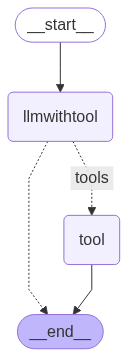

In [152]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [153]:
app2.invoke({"messages":["what is the weather in Bengaluru"]})

{'messages': [HumanMessage(content='what is the weather in Bengaluru', additional_kwargs={}, response_metadata={}, id='9aac4e94-01b7-430c-8819-43ac2544a124'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6d7vyds5f', 'function': {'arguments': '{"query":"Bengaluru weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 132, 'total_tokens': 247, 'completion_time': 0.452145035, 'prompt_time': 0.008450365, 'queue_time': 0.102607853, 'total_time': 0.4605954}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--277a7d80-1a6f-4e42-865c-6c614d079dfc-0', tool_calls=[{'name': 'search', 'args': {'query': 'Bengaluru weather'}, 'id': '6d7vyds5f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 115, 'total_tokens': 247}),
  ToolMessage(content='the temperature is 25 degress and it is c

In [154]:
app2.invoke({"messages":["hi, how are you"]})

{'messages': [HumanMessage(content='hi, how are you', additional_kwargs={}, response_metadata={}, id='652da182-5111-4352-841e-2ea17f8070f2'),
  AIMessage(content='Your message does not require a tool call. If you have a specific query about the weather, feel free to ask, and I can assist you with the search tool!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 312, 'prompt_tokens': 130, 'total_tokens': 442, 'completion_time': 1.465543434, 'prompt_time': 0.008336659, 'queue_time': 0.107993485, 'total_time': 1.473880093}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--6ddd316b-17f4-45c7-87fc-ace805ad7274-0', usage_metadata={'input_tokens': 130, 'output_tokens': 312, 'total_tokens': 442})]}